In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

data=pd.read_csv(r'C:\Users\Administrator\Desktop\Shubham\ML\Datasets\iris.csv')
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
data.shape

(150, 5)

In [3]:
data.size

750

In [4]:
data.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


In [6]:
data.isna().sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

In [7]:
data.groupby('Species').size()

Species
setosa        50
versicolor    50
virginica     50
dtype: int64

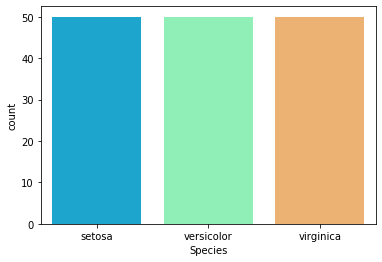

In [8]:
sns.countplot(x='Species',data=data,palette='rainbow')

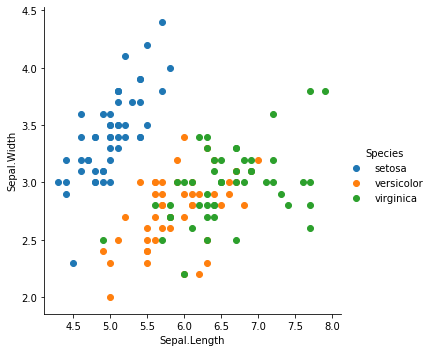

In [9]:
sns.FacetGrid(data,hue='Species',height=5).map(plt.scatter,'Sepal.Length','Sepal.Width').add_legend()

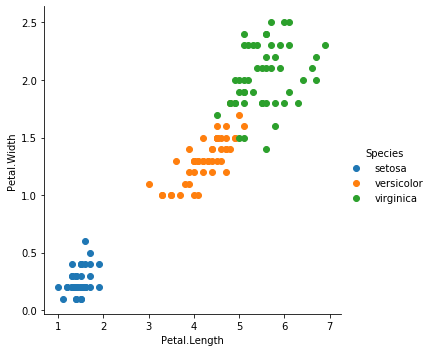

In [10]:
sns.FacetGrid(data,hue='Species',height=5).map(plt.scatter,'Petal.Length','Petal.Width').add_legend()

In [11]:
X=data.iloc[:,0:4]
y=data.iloc[:,-1]


from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)


In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import StratifiedKFold,GridSearchCV
import numpy as np

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)


In [13]:
parameters={'n_neighbors':np.arange(1,13,2)}

knn=KNeighborsClassifier()
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)

cv=GridSearchCV(knn,param_grid=parameters,cv=kfold)

cv.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [14]:
print(cv.best_estimator_)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')


In [15]:
print(cv.best_params_)

{'n_neighbors': 7}


In [16]:
print(cv.best_score_)

0.9714285714285714


In [17]:
result=pd.DataFrame(cv.cv_results_ )
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005664,0.011328,0.022461,0.037599,1,{'n_neighbors': 1},0.913043,0.954545,0.95,0.95,1.0,0.952381,0.027821,4
1,0.003125,0.006250,0.006250,0.007655,3,{'n_neighbors': 3},0.869565,0.954545,0.95,0.90,1.0,0.933333,0.045783,5
2,0.001758,0.001435,0.006055,0.006431,5,{'n_neighbors': 5},0.913043,0.954545,0.95,1.00,1.0,0.961905,0.033379,2
3,0.002539,0.000479,0.003516,0.000478,7,{'n_neighbors': 7},0.913043,1.000000,0.95,1.00,1.0,0.971429,0.036279,1
4,0.003125,0.006250,0.003125,0.006250,9,{'n_neighbors': 9},0.913043,0.954545,0.95,1.00,1.0,0.961905,0.033379,2
5,0.003125,0.006250,0.003125,0.006250,11,{'n_neighbors': 11},0.913043,0.909091,0.95,1.00,0.9,0.933333,0.036393,5
